# Präsenzversuch zum Laval-Rotor

Name:  Vladimir Pascari
Datum:  28/01/2024
Gruppe: 14

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Feststellung der kritischen Drehzahlen eines rotierenden Systems durch einen experimentellen Vorgang. Wie gut passen die experimentelle und theoretische kritische Drehzahlen zueinander? 

## Erster Versuch: Prüfstand #03
Hier werden Sie die Messergebnisse des ersten Prüfstands auswerten. Die Auswertung des zweiten Prüfstands kann analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.
Bitte ergänzen Sie im Titel der Markdown-Zellen die Nummer des Prüfstands

###  Versuchsaufbau
- Bild des Prüfstands:

![pruefstand](figures/Pruefstand.jpeg)

- Beschreibung des Aufbaus, gehen Sie auf die Anzahl der Scheiben und deren Gewicht ein:

Versuchsaufbau:\
    - RaspberryPI\
    -Beschleunigungssesnsor\
    -Schaft der Länge 750 mm und Durchmesser 10mm\
    -Scheibe mit 15mm Dicke, 99 mm Durchmesser und 950 gramm Masse, mittig auf dem Schaft montiert\
    -Der Prüfstand mit einem Elektromotor, in dem der Schaft montiert und gedreht wird\
Versuchsfurchführung:\
    Dei Versuchsdurchführung ist automatiesiert. Sobald das Programm gestartet wird, wird der Motor den Schaft mit der Schaibe auf verschieden vordefinierte Drehzahlen bringen, eine bestimmte Zeit die Drehzahl festhalten, während Daten mit dem Bescheunigungssensor gesammelt werden.
    

### Versuchsauswertung

In [1]:
import os
import h5py
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import importlib
import json

from functions import m_postprocessing

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1. Einlesen der Mess- und Metadaten

Beim Einlesen der Mess- und Metadaten geben wir Ihnen bereits eine Struktur vor. Es bietet sich an diese zu verwenden, ist aber nicht zwingend erforderlich.

##### 1.a) Angabe der Pfade und Dateinamen
Passen Sie die unten stehenden Pfade an, indem Sie `None` ersetzen.

In [2]:
path_measurement_folder = os.path.join(
    "measurement_data", "data_20240117_090743_lavalrotor_14_03"
)  # path to the folder with H5-file and metadata
filename = "data_20240117_090743_lavalrotor_14_03.h5"  # name of the H5-file

##### 1.b) Preparieren der Metadaten
Wenn Sie die Pfade oben korrekt definiert haben, dann müssen Sie hier nichts anpassen. Schauen Sie sich die Struktur von `setup_dict` an und die zurückgegebenen IDs `uuid_acceleration` und `uuid_motor_rpm`.

In [3]:
setup_dict = m_postprocessing.evaluate_measurement_metadata(path_measurement_folder)
print(json.dumps(setup_dict, indent=2, default=str))

uuid_acceleration, uuid_motor_rpm = m_postprocessing.extract_uuid(setup_dict)

{
  "1ee4d7f7-565f-6f82-8db2-2cf8a3c4cb18": {
    "type": "group",
    "name": "group_info",
    "comment": "",
    "path": "measurement_data/data_20240117_090743_lavalrotor_14_03/1ee4d7f7-565f-6f82-8db2-2cf8a3c4cb18.json"
  },
  "1ee823cd-7650-61c2-9b01-d4744d892e2a": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240117_090743_lavalrotor_14_03/1ee823cd-7650-61c2-9b01-d4744d892e2a.json"
  },
  "1ee823b5-5d9b-6f24-9817-906ef09da71d": {
    "type": "instrument",
    "name": "motor_controller",
    "comment": "",
    "path": "measurement_data/data_20240117_090743_lavalrotor_14_03/1ee823b5-5d9b-6f24-9817-906ef09da71d.json"
  },
  "1ee8239a-489e-66bc-932e-2587341b8ad5": {
    "type": "actor",
    "name": "brushless_DC_motor",
    "comment": "",
    "path": "measurement_data/data_20240117_090743_lavalrotor_14_03/1ee8239a-489e-66bc-932e-2587341b8ad5.json"
  },
  "1ee823d5-1451-6df6-a364-c723014c91a1": {
    "type": "sensor",
  

##### 1.c) Initialisieren der Datenstrukturen für die Messdaten
Hier wird der Vektor `interpolation_points` mit Stützstellen für die Interplation der Messdaten für alle Drehzahlen erzeugt. Dieses vereinfacht später die Darstellung des Campbell-Diagramms enorm.

Initialisieren Sie Datenstrukturen um alle nötigen Daten für das Campbell-Diragramm abspeichern zu können, verwenden Sie dazu ggf. `interpolation_points`.

In [4]:
measurement_time_in_s = 10
number_interpolation_points = 2000

interpolation_points = np.linspace(measurement_time_in_s/number_interpolation_points, measurement_time_in_s, number_interpolation_points, endpoint=True)

In [5]:
f = h5py.File((path_measurement_folder + "/" + filename), "r")
data_dict = {}
a = list(f.keys())

for i in a:
    c = list(f[i]["RawData"][uuid_acceleration].keys())
    b = list(f[i]["RawData"][uuid_motor_rpm].keys())[0]
    acc_x = f[i]["RawData"][uuid_acceleration][c[0]][()]
    acc_y = f[i]["RawData"][uuid_acceleration][c[1]][()]
    acc_z = f[i]["RawData"][uuid_acceleration][c[2]][()]
    vec_time = f[i]["RawData"][uuid_acceleration][c[3]][()]
    motor_rpm = f[i]["RawData"][uuid_motor_rpm][b][()]
    data_dict[i] = [acc_x, acc_y, acc_z, vec_time, motor_rpm]

print(len(data_dict))

20


#### 2. Verarbeitung der Messdaten

Verarbeiten Sie die Messdaten für alle untersuchten Drehzahlen mit `m_postprocessing.get_vec_accel()`, `m_postprocessing.interpolation()` und `m_postprocessing.my_fft_scaled()`.

9


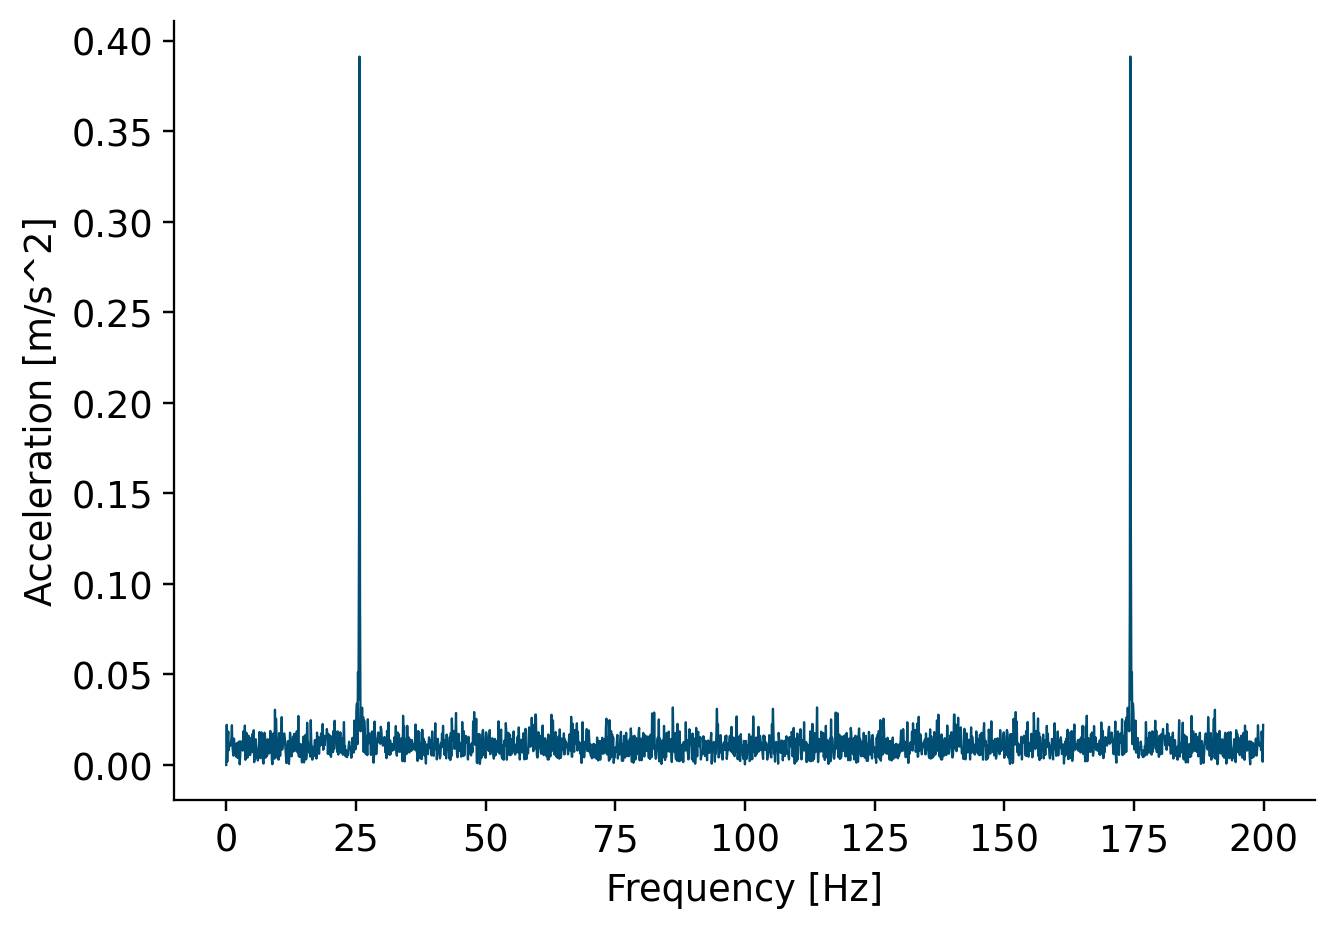

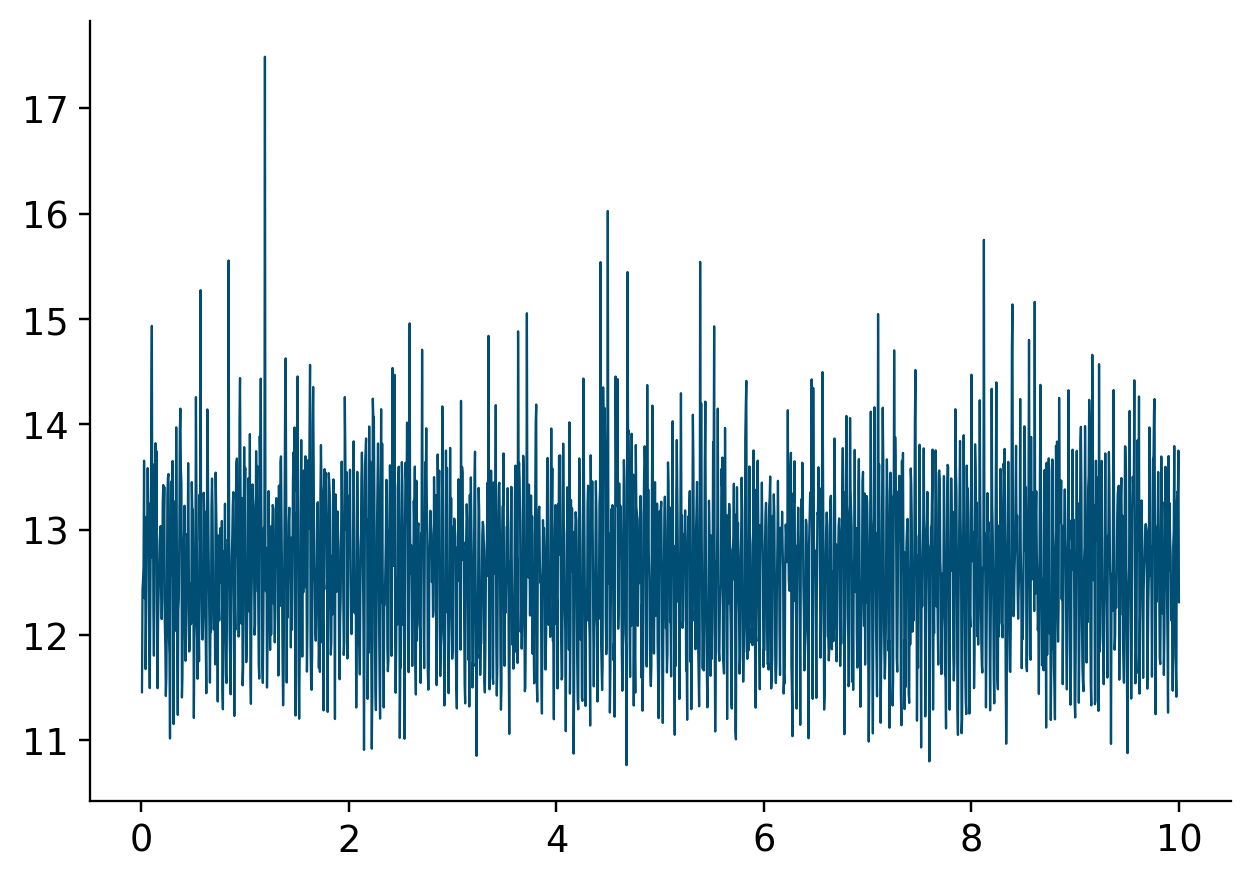

In [6]:
importlib.reload(m_postprocessing)  # reload functions
data_dict_proc = {}
for i in data_dict:
    acc_x = data_dict[i][0]
    acc_y = data_dict[i][1]
    acc_z = data_dict[i][2]
    vec_time = data_dict[i][3]
    acc_abs = m_postprocessing.get_vec_accel(acc_x, acc_y, acc_z)
    int_acc = m_postprocessing.interpolation(vec_time, acc_abs, interpolation_points)
    data_fft = m_postprocessing.my_fft_scaled(int_acc, interpolation_points)
    
    data_dict_proc[i] = [acc_abs, int_acc, data_fft]
    
print(i)
#data_fft = data_dict_proc["0"][2]
plt.figure(1)
plt.plot(data_fft[1], data_fft[0])
plt.ylabel("Acceleration [m/s^2]")
plt.xlabel("Frequency [Hz]")
plt.show

plt.figure(2)
plt.plot(interpolation_points, int_acc)
plt.show()


#### 3. Darstellung mittels Campbell-Diagramm

Erzeugen Sie hier ein Campbell-Diagramm aus den Messdaten.

2000
[6.91767654e-310 6.40562071e+170 1.49260643e+108 ... 4.29915576e+271
 3.75475053e+021 1.47100761e+031]


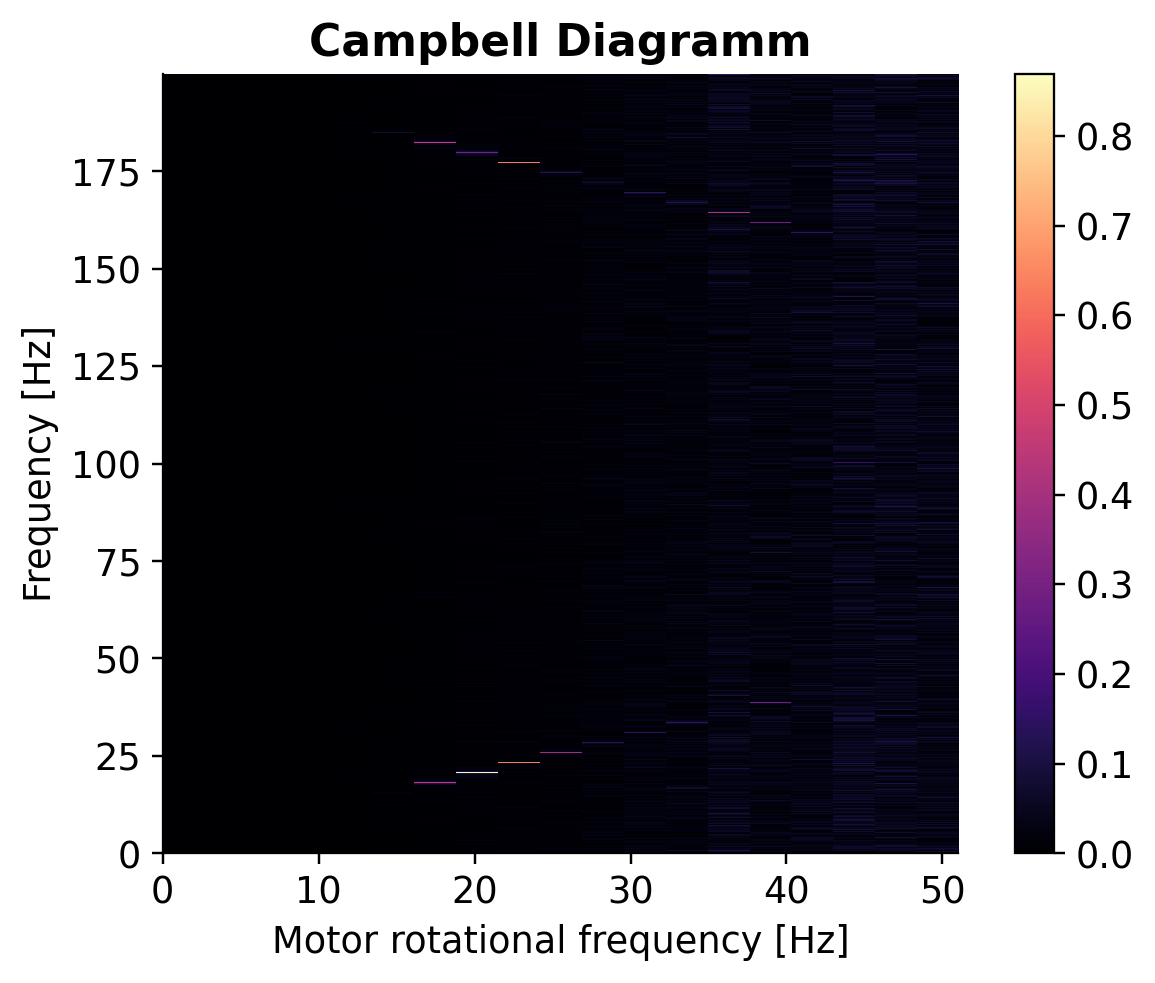

In [7]:
data_fft = data_dict_proc["0"][2]
X = data_fft[0]
print(len(X))

z = np.empty((len(X), len(data_dict)))
print(z[:,0])
for i in data_dict_proc:
    j = int(i)
    z[:,j] = data_dict_proc[i][2][0]

y= data_dict_proc[i][2][1]
x = [data_dict[i][4]/60 for i in data_dict]
z = z[:-1, :-1] 

plt.figure(3)


c = plt.imshow(z, cmap='magma', vmin = np.min(z), vmax = np.max(z),
                 extent =[0, max(x), 0, max(y)], 
                    interpolation ='none', origin ='lower', aspect = 1/4) 
plt.colorbar(c) 
plt.xlabel("Motor rotational frequency [Hz]")
plt.ylabel("Frequency [Hz]")
plt.title('Campbell Diagramm',  
                                     fontweight ="bold") 
plt.show() 



## Zweiter Datensatz: Prüfstand #02

#### 1. Einlesen der Mess- und Metadaten

In [8]:
path_measurement_folder = os.path.join(
    "measurement_data", "data_20240102_100928_lavalrotor_01_02"
)  # path to the folder with H5-file and metadata
filename = "data_20240102_100928_lavalrotor_01_02.h5"  # name of the H5-file


setup_dict = m_postprocessing.evaluate_measurement_metadata(path_measurement_folder)
print(json.dumps(setup_dict, indent=2, default=str))

uuid_acceleration, uuid_motor_rpm = m_postprocessing.extract_uuid(setup_dict)


f = h5py.File((path_measurement_folder + "/" + filename), "r")
data_dict = {}
a = list(f.keys())

for i in a:
    
    c = list(f[i]["RawData"][uuid_acceleration].keys())
    b = list(f[i]["RawData"][uuid_motor_rpm].keys())[0]
    acc_x = f[i]["RawData"][uuid_acceleration][c[0]][()]
    acc_y = f[i]["RawData"][uuid_acceleration][c[1]][()]
    acc_z = f[i]["RawData"][uuid_acceleration][c[2]][()]
    vec_time = f[i]["RawData"][uuid_acceleration][c[3]][()]
    motor_rpm = f[i]["RawData"][uuid_motor_rpm][b][()]
    data_dict[i] = [acc_x, acc_y, acc_z, vec_time, motor_rpm]

print(len(data_dict))

{
  "1ee4d7f7-565f-6f82-8db2-2cf8a3c4cb18": {
    "type": "group",
    "name": "group_info",
    "comment": "",
    "path": "measurement_data/data_20240102_100928_lavalrotor_01_02/1ee4d7f7-565f-6f82-8db2-2cf8a3c4cb18.json"
  },
  "1ee823cc-06c7-631a-99e2-dc18593ae07a": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240102_100928_lavalrotor_01_02/1ee823cc-06c7-631a-99e2-dc18593ae07a.json"
  },
  "1ee823b3-32d9-6d20-8261-106b0e021eed": {
    "type": "instrument",
    "name": "motor_controller",
    "comment": "",
    "path": "measurement_data/data_20240102_100928_lavalrotor_01_02/1ee823b3-32d9-6d20-8261-106b0e021eed.json"
  },
  "1ee82398-0056-698f-8809-248cede81c54": {
    "type": "actor",
    "name": "brushless_DC_motor",
    "comment": "",
    "path": "measurement_data/data_20240102_100928_lavalrotor_01_02/1ee82398-0056-698f-8809-248cede81c54.json"
  },
  "1ee823d3-8511-6a0b-8cd5-972f083673c9": {
    "type": "sensor",
  

#### 2. Verarbeitung der Messdaten

9


<function matplotlib.pyplot.show(close=None, block=None)>

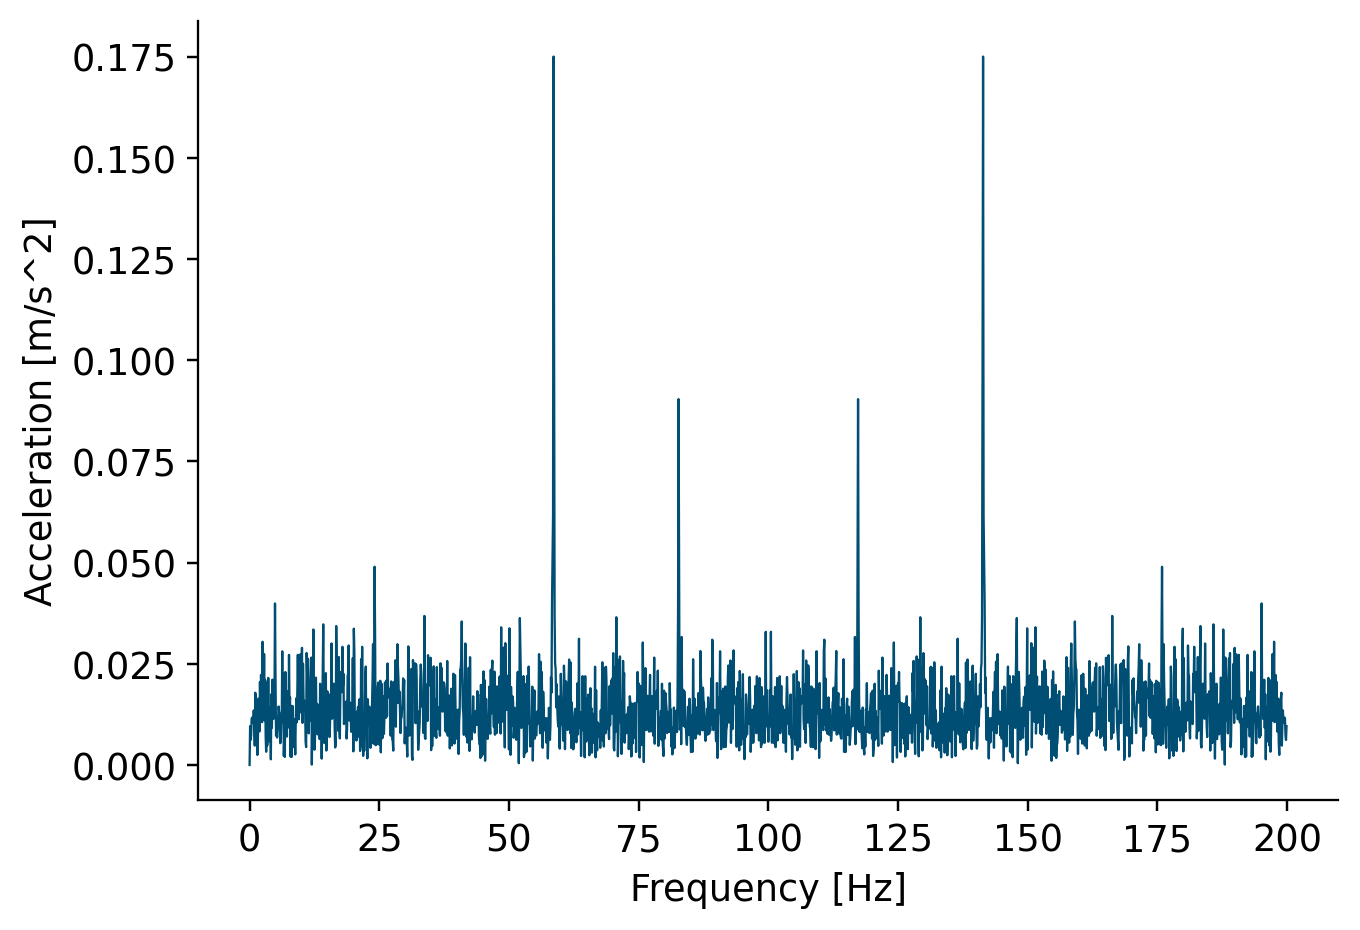

In [9]:
importlib.reload(m_postprocessing)  # reload functions
data_dict_proc = {}
for i in data_dict:
    acc_x = data_dict[i][0]
    acc_y = data_dict[i][1]
    acc_z = data_dict[i][2]
    vec_time = data_dict[i][3]
    acc_abs = m_postprocessing.get_vec_accel(acc_x, acc_y, acc_z)
    int_acc = m_postprocessing.interpolation(vec_time, acc_abs, interpolation_points)
    data_fft = m_postprocessing.my_fft_scaled(int_acc, interpolation_points)
    
    data_dict_proc[i] = [acc_abs, int_acc, data_fft]
    
print(i)
#data_fft = data_dict_proc["0"][2]
plt.figure(1)
plt.plot(data_fft[1], data_fft[0])
plt.ylabel("Acceleration [m/s^2]")
plt.xlabel("Frequency [Hz]")
plt.show



#### 3. Darstellung mittels Campbell-Diagramm

2000
41


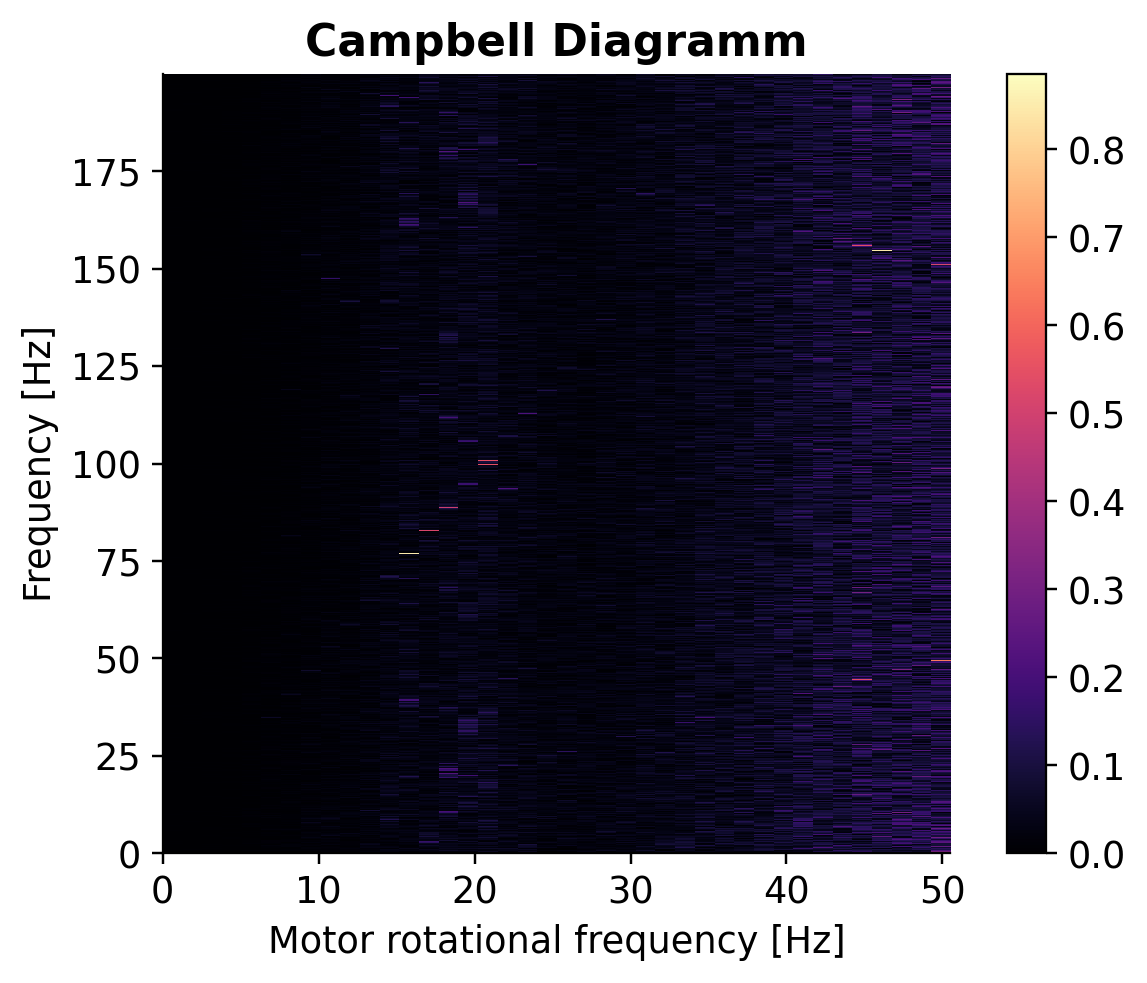

In [10]:
data_fft = data_dict_proc["0"][2]
X = data_fft[0]
print(len(X))
print(len(data_dict))
z = np.empty((len(X), len(data_dict)))
#print(z[:,0])
for i in data_dict_proc:
    j = int(i)
    z[:,j] = data_dict_proc[i][2][0]

y= data_dict_proc[i][2][1]
x = [data_dict[i][4]/60 for i in data_dict]
z = z[:-1, :-1] 

plt.figure(3)


c = plt.imshow(z, cmap='magma', vmin = np.min(z), vmax = np.max(z),
                 extent =[0, max(x), 0, max(y)], 
                    interpolation ='none', origin ='lower', aspect = 1/4) 
plt.colorbar(c) 
plt.xlabel("Motor rotational frequency [Hz]")
plt.ylabel("Frequency [Hz]")
plt.title('Campbell Diagramm',  
                                     fontweight ="bold") 
plt.show() 



## Dritter Datensatz: Prüfstand #04

#### 1. Einlesen der Mess- und Metadaten

In [11]:
path_measurement_folder = os.path.join(
    "measurement_data", "data_20240109_104244_lavalrotor_01_04"
)  # path to the folder with H5-file and metadata
filename = "data_20240109_104244_lavalrotor_01_04.h5"  # name of the H5-file


setup_dict = m_postprocessing.evaluate_measurement_metadata(path_measurement_folder)
print(json.dumps(setup_dict, indent=2, default=str))

uuid_acceleration, uuid_motor_rpm = m_postprocessing.extract_uuid(setup_dict)



f = h5py.File((path_measurement_folder + "/" + filename), "r")
data_dict = {}
a = list(f.keys())

for i in a:
    c = list(f[i]["RawData"][uuid_acceleration].keys())
    b = list(f[i]["RawData"][uuid_motor_rpm].keys())[0]
    acc_x = f[i]["RawData"][uuid_acceleration][c[0]][()]
    acc_y = f[i]["RawData"][uuid_acceleration][c[1]][()]
    acc_z = f[i]["RawData"][uuid_acceleration][c[2]][()]
    vec_time = f[i]["RawData"][uuid_acceleration][c[3]][()]
    motor_rpm = f[i]["RawData"][uuid_motor_rpm][b][()]
    data_dict[i] = [acc_x, acc_y, acc_z, vec_time, motor_rpm]

print(len(data_dict))

{
  "1ee4d7f7-565f-6f82-8db2-2cf8a3c4cb18": {
    "type": "group",
    "name": "group_info",
    "comment": "",
    "path": "measurement_data/data_20240109_104244_lavalrotor_01_04/1ee4d7f7-565f-6f82-8db2-2cf8a3c4cb18.json"
  },
  "1ee823ce-82b9-6d4e-a621-60af4e6f5cc1": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240109_104244_lavalrotor_01_04/1ee823ce-82b9-6d4e-a621-60af4e6f5cc1.json"
  },
  "1ee823b6-50dc-6670-aea5-35f6dd717e83": {
    "type": "instrument",
    "name": "motor_controller",
    "comment": "",
    "path": "measurement_data/data_20240109_104244_lavalrotor_01_04/1ee823b6-50dc-6670-aea5-35f6dd717e83.json"
  },
  "1ee8239b-46ec-63dc-8aa4-b8751ac37fd3": {
    "type": "actor",
    "name": "brushless_DC_motor",
    "comment": "",
    "path": "measurement_data/data_20240109_104244_lavalrotor_01_04/1ee8239b-46ec-63dc-8aa4-b8751ac37fd3.json"
  },
  "1ee823d6-3d20-6332-83f5-6876b760dcf3": {
    "type": "sensor",
  

#### 2. Verarbeitung der Messdaten

9


<function matplotlib.pyplot.show(close=None, block=None)>

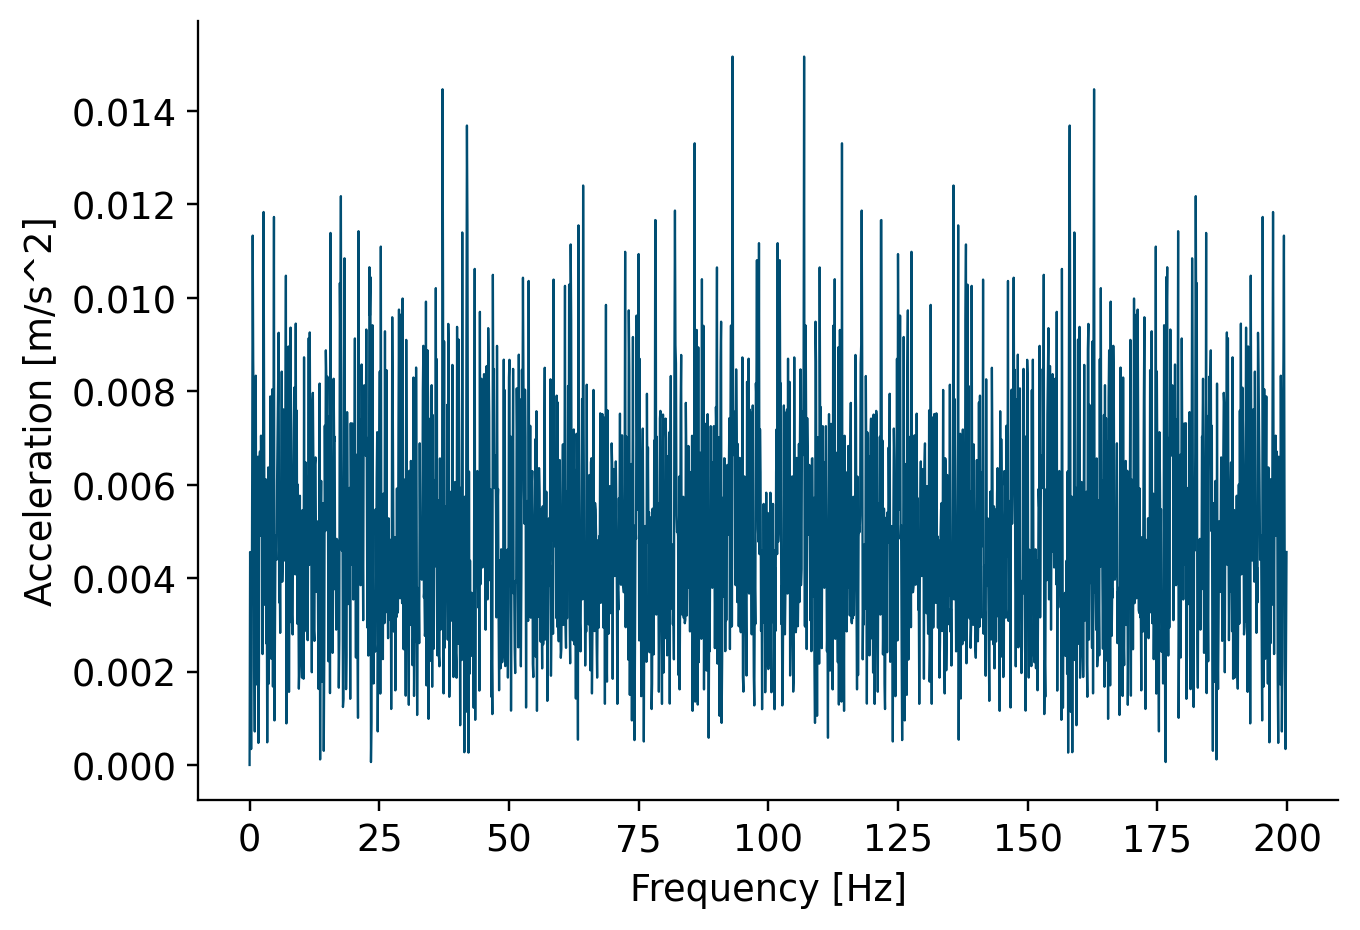

In [12]:
importlib.reload(m_postprocessing)  # reload functions
data_dict_proc = {}
for i in data_dict:
    acc_x = data_dict[i][0]
    acc_y = data_dict[i][1]
    acc_z = data_dict[i][2]
    vec_time = data_dict[i][3]
    acc_abs = m_postprocessing.get_vec_accel(acc_x, acc_y, acc_z)
    int_acc = m_postprocessing.interpolation(vec_time, acc_abs, interpolation_points)
    data_fft = m_postprocessing.my_fft_scaled(int_acc, interpolation_points)
    
    data_dict_proc[i] = [acc_abs, int_acc, data_fft]
    
print(i)
#data_fft = data_dict_proc["0"][2]
plt.figure(1)
plt.plot(data_fft[1], data_fft[0])
plt.ylabel("Acceleration [m/s^2]")
plt.xlabel("Frequency [Hz]")
plt.show

#### 3. Darstellung mittels Campbell-Diagramm

2000
[6.91767654e-310 7.29111856e-304 7.29111856e-304 ... 7.29111856e-304
 7.29111856e-304 7.29111856e-304]


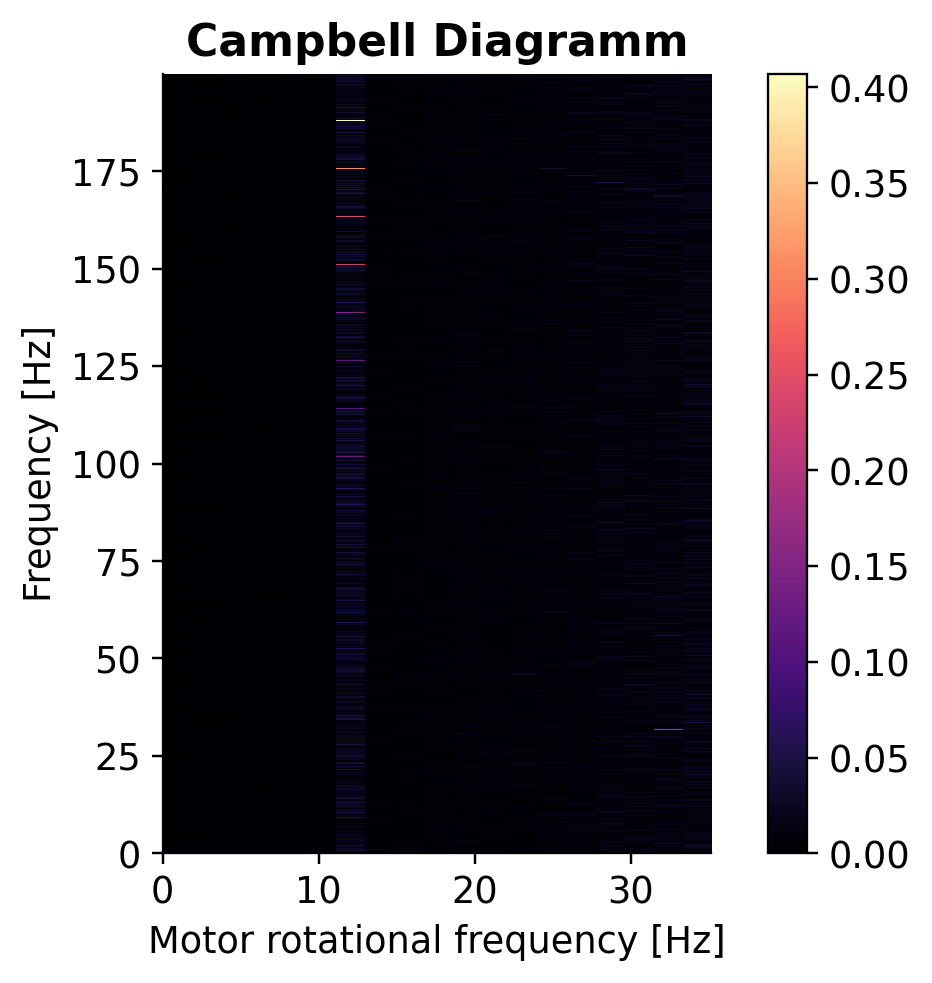

In [13]:
data_fft = data_dict_proc["0"][2]
X = data_fft[0]
print(len(X))

z = np.empty((len(X), len(data_dict)))
print(z[:,0])
for i in data_dict_proc:
    j = int(i)
    z[:,j] = data_dict_proc[i][2][0]

y= data_dict_proc[i][2][1]
x = [data_dict[i][4]/60 for i in data_dict]
z = z[:-1, :-1] 

plt.figure(3)


c = plt.imshow(z, cmap='magma', vmin = np.min(z), vmax = np.max(z),
                 extent =[0, max(x), 0, max(y)], 
                    interpolation ='none', origin ='lower', aspect = 1/4) 
plt.colorbar(c) 
plt.xlabel("Motor rotational frequency [Hz]")
plt.ylabel("Frequency [Hz]")
plt.title('Campbell Diagramm',  
                                     fontweight ="bold") 
plt.show() 



## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Nach der Durchführung der Versuchen und Erzeugung der Campbell Diagrammmen kann man deutlich erkennen, wo die kritische Drehzahlen
des Systems liegen.



##### Vergleich der gemessenen mit der analytisch berechneten kritischen Drehzahl
Sie können für den Vergleich, falls benötigt auch Code Cells einfügen.

In [15]:
m = 0.95
print("Masse der Scheibe ist ", m," kg")
d = 10
print ("Schaftdurchmesser ",d," mm")
l = 750 
print ("Schaftlänge ",l," mm")
E = 210000
print ("E-Modul des Schafts ",E,"N/mm^2")
s =0
print("Abstand zwischen den Scheiben ", s, "da nur eine Scheibe vorhanden")
I = np.pi * (d/2)**4/4 
print("Flächenträgheitsmoment ",I," mm^4")
gamma = 0
alpha1 = 1
alpha2 = 1
k = 48*E*I/(l**3)
print ("k ist", k, " N/mm oder ", k*1000,"in N/m")
wkrit = (k*1000/m)**0.5
print("Die theoretische kritische Drehzahl ist ", wkrit, " rad/s und ", wkrit/(2*np.pi)," in Hz")

Masse der Scheibe ist  0.95  kg
Schaftdurchmesser  10  mm
Schaftlänge  750  mm
E-Modul des Schafts  210000 N/mm^2
Abstand zwischen den Scheiben  0 da nur eine Scheibe vorhanden
Flächenträgheitsmoment  490.8738521234052  mm^4
k ist 11.728612573401893  N/mm oder  11728.612573401893 in N/m
Die theoretische kritische Drehzahl ist  111.11214142478757  rad/s und  17.684046545280694  in Hz


Die kritische Drehzahl für den Prüftstand 3 ergibt sich bei 20 Hz Motordrehzahl. Das liegt in guter Nähe zu dem theoretischen Wert von 17.7 Hz. Der experimentell ermittelte Wert ist hier aussagekräftiger, da er sich auf das wahre System basiert, während der theoretische Wert aus einem theoretischem und idealisiertem Model folgt. Die Tatsache, dass sich die Werte nicht wesentlich unterscheiden, weist darauf, dass keine grobe Fehlern bei dem analytischem oder experimentellem Verfahren stattgefunden haben.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Die versuche wurden erfolgreich durchgeführt und haben sinnvolle Ergebnisse geliefert.